In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from pandas.plotting import table
import matplotlib.pyplot as plt

In [2]:
cte_height = 1080;
cte_width = 1920;

Aqui nos lemos o dataset que dividimos em 4 partes para caber no Github

In [3]:
Info1 = pd.read_csv("Depth0_part1")
Info2 = pd.read_csv("Depth0_part2")
Info3 = pd.read_csv("Depth0_part3")
Info4 = pd.read_csv("Depth0_part4")
Informacoes = pd.concat([Info1,Info2,Info3,Info4])

In [4]:
Informacoes.set_index("index",inplace=True)

In [5]:
Informacoes.head()

,Origem,Frame,Height,Weight,QP,Split
index,,,,,,
0,Crowdrun,323,0,0,41,1
1,Crowdrun,323,0,64,41,1
2,Crowdrun,323,0,128,41,0
3,Crowdrun,323,0,192,41,0
4,Crowdrun,323,0,256,41,0


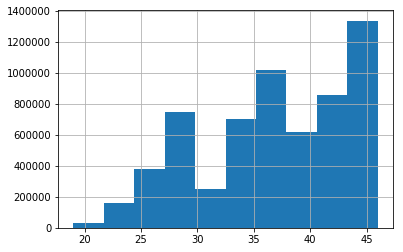

In [7]:
oi = Informacoes['QP'].hist()

In [8]:
os.getcwd()

'/home/tomas/Desktop/UNB/Deeplearning_Video_Compressing'

Lemos os videos para podermos mapear o canal Y de cada frame

In [9]:
parkjoy = np.fromfile('./Videos/ParkJoy_1920x1080_50_8bit_420.yuv',dtype='uint8')
rushhour= np.fromfile('./Videos/RushHour_1920x1080_25_8bit_420.yuv',dtype='uint8')
oldtown = np.fromfile('./Videos/OldTownCross_1920x1080_50_8bit_420.yuv',dtype='uint8')
ducks = np.fromfile('./Videos/DucksTakeOff_1920x1080_50_8bit_420.yuv',dtype='uint8')
crowdrun = np.fromfile('./Videos/Crowdrun_1920x1080_50_8bit_420.yuv',dtype='uint8')
sunflower = np.fromfile('./Videos/Sunflower_1920x1080_25_8bit_420.yuv',dtype='uint8')

In [10]:
crowdrun.shape

(1555200000,)

In [11]:
parkjoy.shape

(1555200000,)

In [12]:
rushhour.shape

(1555200000,)

In [13]:
oldtown.shape

(1555200000,)

In [14]:
ducks.shape

(1555200000,)

In [15]:
crowdrun.shape

(1555200000,)

In [16]:
sunflower.shape

(1555200000,)

In [17]:
Informacoes = Informacoes.sample(frac=1)

In [18]:
Data_Validation = Informacoes.iloc[int(4*Informacoes.shape[0]/5):].copy()

In [19]:
Test_set = Informacoes.iloc[int(3*Informacoes.shape[0]/5):int(4*Informacoes.shape[0]/5)].copy()

In [20]:
Training_set = Informacoes.iloc[:int(3*Informacoes.shape[0]/5)].copy()

In [22]:
Informacoes.head()

,Origem,Frame,Height,Weight,QP,Split
index,,,,,,
3074825,Ducks,116,64,320,38,1
1857749,ParkJoy,154,640,1856,27,1
1814245,ParkJoy,57,320,1600,29,1
1381050,OldTown,112,1024,0,28,1
284467,SunFlower,57,832,448,29,0


In [ ]:
Informacoes["Height_Final"] = Informacoes["Height"]+63
Informacoes["Weight_Final"] = Informacoes["Weight"]+63

In [23]:
Map = {"OldTown":oldtown,'Crowdrun':crowdrun,'SunFlower':sunflower,"ParkJoy":parkjoy,'Ducks':ducks,'RushHour':rushhour}

In [22]:
Y = np.zeros([cte_height,cte_width], dtype='uint8')

In [23]:
Y.shape

(1080, 1920)

In [55]:
begin_Frame = int(Training_set.iloc[0]['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
end_Frame = (int(Training_set.iloc[0]['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width

In [56]:
begin_Frame = int(begin_Frame)
end_Frame = int(end_Frame)

In [57]:
Training_set.iloc[2]['Origem']

'OldTown'

In [58]:
Input = Map[Training_set.iloc[2]['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width])

In [59]:
Input

array([[157, 156, 159, ..., 159, 153, 158],
       [158, 156, 156, ..., 159, 154, 152],
       [163, 161, 156, ..., 156, 156, 155],
       ...,
       [ 58,  57,  53, ...,  97,  93, 104],
       [ 54,  49,  51, ..., 100,  97,  95],
       [ 49,  53,  50, ...,  96,  99,  96]], dtype=uint8)

In [60]:
cv2.imwrite('myImage.png',Input)

True

In [41]:
type(Input)

numpy.ndarray

In [43]:
Training_set.iloc[0]

Origem    rushhour
Frame          344
Height         256
Weight         192
Split            1
Name: 436173, dtype: object

In [ ]:
Informacoes